In [5]:
# Run this cell once when starting on notebook.
# On Google Colab, wait for the Google Drive permission prompts before proceeding
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
from datascience import *
import numpy as np
import math
DATA_FILENAME="data/Life-Expectancy-Data-Updated.csv"

# Life Expectancy Analysis Project

## World Health Organization - Life Expectancy Dataset

## Data Source
**Original Source:** [World Health Organization (WHO) Global Health Observatory](https://www.who.int/data/gho) and United Nations.

**Dataset Description:**
The dataset contains health and economic data for 193 countries from 2000 to 2015. It was originally aggregated by the WHO to monitor global health conditions.
* **Observations:** 2,938 rows (Country-Year pairs)
* **Key Variables:** Life Expectancy, Adult Mortality, Infant Deaths, BMI, GDP per capita, and Immunization coverage (Polio, Hepatitis B, Measles).

**Data Processing Note:**
The original WHO categorical status has been encoded into two binary columns for analysis:
* `Economy Status - Developed` (1 if Developed, 0 otherwise)
* `Economy Status - Developing` (1 if Developing, 0 otherwise)
The Global Health Observatory (GHO) data repository, maintained by the World Health Organization (WHO), monitors the health conditions and various related factors across all countries. This repository makes its datasets available to the public to facilitate the analysis of health data. Specifically, the dataset concerning the life expectancy and critical health factors for 193 countries has been gathered from the WHO data repository, while the associated economic data was sourced from the United Nations website. Only the most representative health-related factors were selected from among all the categories.

The first 18 columns are:
* `Country`: Country name
* `Region`: Region of the word
* `Status`: Country status - developed or developing
* `Year`: Year of the data
* `Infant Deaths`: Number of infant deaths per 1000 population
* `Under 5 Deaths`: Number of Under 5 year old deaths per 1000 population
* `Adult Mortality`: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* `Alcohol Consum`: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* `Hepatitis B`: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* `Measles`: Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%)
* `BMI`: Average Body Mass Index of entire population
* `Polio`: Polio (Pol3) immunization coverage among 1-year-olds (%)
* `HIV`: Deaths per 1000 live births HIV (0-4 years)
* `GDP per capita`: Gross Domestic Product per capita (in USD)
* `Pop (million)`: Population of the country
* `Thin 10-19`: Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
* `School`: Number of years of Schooling (years)
* `Life Expectancy`: Life expectancy in age

The database also has two columns that categorize countries into two groups: Developed vs Developing countries. According to World Trade Organization, each country defines itself as “Developed” or “Developing”:

* `Economy Status - Developed`: `1` if the country is categorized as `Developed`, otherwise `0`
* `Economy Status - Developing`: `1` if the country is categorized as `Developing`, otherwise `0`
  

In [6]:
# Read the dataset
life_expectancy_uncleaned = Table.read_table("data/Life-Expectancy-Data-Updated.csv")
life_expectancy_uncleaned

Country,Region,Year,Infant Deaths,Under 5 Deaths,Adult Mortality,Alcohol Consum,Hepatitis B,Measles,BMI,Polio,HIV,GDP per capita,Population (million),Thin 10-19,Schooling,Life Expectancy,Economy Status - Developed,Economy Status - Developing
Turkiye,Middle East,2015,11.1,13,105.824,1.32,97,65,27.8,97,0.08,11006,78.53,4.9,7.8,76.5,0,1
Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26,97,0.09,25742,46.44,0.6,9.7,82.8,1,0
India,Asia,2007,51.5,67.9,201.077,1.57,60,35,21.2,67,0.13,1076,1183.21,27.1,5,65.4,0,1
Guyana,South America,2006,32.8,40.5,222.196,5.68,93,74,25.3,92,0.79,4146,0.75,5.7,7.9,67,0,1
Israel,Middle East,2012,3.4,4.3,57.951,2.89,97,89,27,94,0.08,33995,7.91,1.2,12.8,81.7,1,0
Costa Rica,Central America and Caribbean,2006,9.8,11.2,95.22,4.19,88,86,26.4,89,0.16,9110,4.35,2,7.9,78.2,0,1
Russian Federation,Rest of Europe,2015,6.6,8.2,223,8.06,97,97,26.2,97,0.08,9313,144.1,2.3,12,71.2,0,1
Hungary,European Union,2000,8.7,10.1,192.969,12.23,88,99,25.9,99,0.08,8971,10.21,2.3,10.2,71.2,1,0
Jordan,Middle East,2001,22,26.1,129.764,0.52,97,87,27.9,97,0.13,3708,5.22,4,9.6,71.9,0,1
Moldova,Rest of Europe,2008,15.3,17.8,217.857,7.72,97,92,26.5,96,0.43,2235,2.87,2.9,10.9,68.7,0,1


In [7]:
from IPython.display import display, HTML

# Convert the table to HTML and wrap in a div with style for scrolling
html_table = life_expectancy_uncleaned.as_html()
scrollable_table = f'<div style="width: 100%; overflow-x: scroll;">{html_table}</div>'

# Display the scrollable table
display(HTML(scrollable_table))

Country,Region,Year,Infant Deaths,Under 5 Deaths,Adult Mortality,Alcohol Consum,Hepatitis B,Measles,BMI,Polio,HIV,GDP per capita,Population (million),Thin 10-19,Schooling,Life Expectancy,Economy Status - Developed,Economy Status - Developing
Turkiye,Middle East,2015,11.1,13,105.824,1.32,97,65,27.8,97,0.08,11006,78.53,4.9,7.8,76.5,0,1
Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26,97,0.09,25742,46.44,0.6,9.7,82.8,1,0
India,Asia,2007,51.5,67.9,201.077,1.57,60,35,21.2,67,0.13,1076,1183.21,27.1,5,65.4,0,1
Guyana,South America,2006,32.8,40.5,222.196,5.68,93,74,25.3,92,0.79,4146,0.75,5.7,7.9,67,0,1
Israel,Middle East,2012,3.4,4.3,57.951,2.89,97,89,27,94,0.08,33995,7.91,1.2,12.8,81.7,1,0
Costa Rica,Central America and Caribbean,2006,9.8,11.2,95.22,4.19,88,86,26.4,89,0.16,9110,4.35,2,7.9,78.2,0,1
Russian Federation,Rest of Europe,2015,6.6,8.2,223,8.06,97,97,26.2,97,0.08,9313,144.1,2.3,12,71.2,0,1
Hungary,European Union,2000,8.7,10.1,192.969,12.23,88,99,25.9,99,0.08,8971,10.21,2.3,10.2,71.2,1,0
Jordan,Middle East,2001,22,26.1,129.764,0.52,97,87,27.9,97,0.13,3708,5.22,4,9.6,71.9,0,1
Moldova,Rest of Europe,2008,15.3,17.8,217.857,7.72,97,92,26.5,96,0.43,2235,2.87,2.9,10.9,68.7,0,1


I noticed that this dataset has 2 columns at the end - `Economy Status - Developed` and `Economy Status - Developing`. So I want to clean that dataset up a little bit as follows:
1. I will add a new column to the table called `Status`. `Status` should have either of the two values:
  - `Developed` corresponding to a 1 in the column `Economy Status - Developed`.
  - `Developing` corresponding to a 1 in the column `Economy Status - Developing`.
2. Drop the columns `Economy Status - Developed` and `Economy Status - Developing`

In [8]:
# Define function: 1 -> "Developed", else -> "Developing"
def econ_status(num):
    if num == 1:
        return "Developed"
    else:
        return "Developing"
# Apply econ_status function to 'Economy Status - Developed' column
funclife = life_expectancy_uncleaned.apply(econ_status, "Economy Status - Developed")
life_expectancy0 = life_expectancy_uncleaned.with_column("Status", funclife)
life_expectancy = life_expectancy0.select("Country", "Region", "Status", "Year", "Infant Deaths", "Under 5 Deaths", "Adult Mortality", "Alcohol Consum", "Hepatitis B", "Measles", "BMI", "Polio", "HIV", "GDP per capita", "Population (million)", "Thin 10-19", "Schooling", "Life Expectancy")
life_expectancy

Country,Region,Status,Year,Infant Deaths,Under 5 Deaths,Adult Mortality,Alcohol Consum,Hepatitis B,Measles,BMI,Polio,HIV,GDP per capita,Population (million),Thin 10-19,Schooling,Life Expectancy
Turkiye,Middle East,Developing,2015,11.1,13,105.824,1.32,97,65,27.8,97,0.08,11006,78.53,4.9,7.8,76.5
Spain,European Union,Developed,2015,2.7,3.3,57.9025,10.35,97,94,26,97,0.09,25742,46.44,0.6,9.7,82.8
India,Asia,Developing,2007,51.5,67.9,201.077,1.57,60,35,21.2,67,0.13,1076,1183.21,27.1,5,65.4
Guyana,South America,Developing,2006,32.8,40.5,222.196,5.68,93,74,25.3,92,0.79,4146,0.75,5.7,7.9,67
Israel,Middle East,Developed,2012,3.4,4.3,57.951,2.89,97,89,27,94,0.08,33995,7.91,1.2,12.8,81.7
Costa Rica,Central America and Caribbean,Developing,2006,9.8,11.2,95.22,4.19,88,86,26.4,89,0.16,9110,4.35,2,7.9,78.2
Russian Federation,Rest of Europe,Developing,2015,6.6,8.2,223,8.06,97,97,26.2,97,0.08,9313,144.1,2.3,12,71.2
Hungary,European Union,Developed,2000,8.7,10.1,192.969,12.23,88,99,25.9,99,0.08,8971,10.21,2.3,10.2,71.2
Jordan,Middle East,Developing,2001,22,26.1,129.764,0.52,97,87,27.9,97,0.13,3708,5.22,4,9.6,71.9
Moldova,Rest of Europe,Developing,2008,15.3,17.8,217.857,7.72,97,92,26.5,96,0.43,2235,2.87,2.9,10.9,68.7


* I wrote a function called econ_status that checks if a value is 1 and labels it as "Developed"—everything else is "Developing." Then I used it on the 'Economy Status - Developed' column in my life_expectancy_uncleaned table to create a new 'Status' column with those labels.

Research question: How does schooling correlate with GDP per capita? Investigate whether higher education levels are associated with higher GDP per capita.

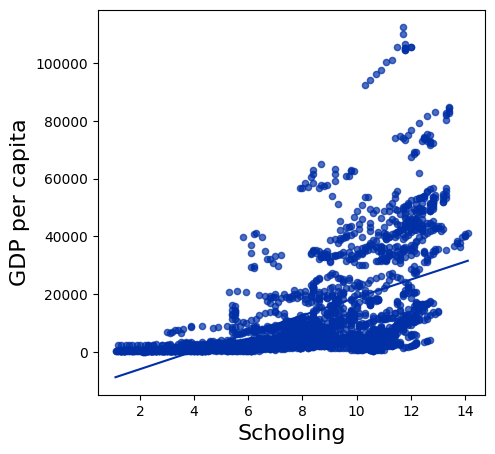

In [9]:
life_expectancy.scatter("Schooling", "GDP per capita", fit_line=True)
plt.show()

This graph indicates that, on average, more schooling is associated with a higher GDP per capita, and the countries with the highest GDPs also tend to have high levels of schooling.

Research question: Are there any noticeable trends over time in the improvement or deterioration of certain health indicators (e.g. life expectancy, infant deaths, under-five deaths) across different regions?

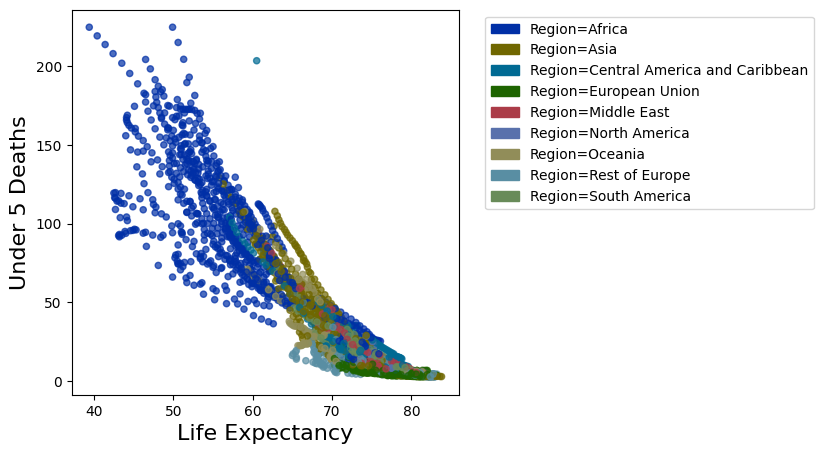

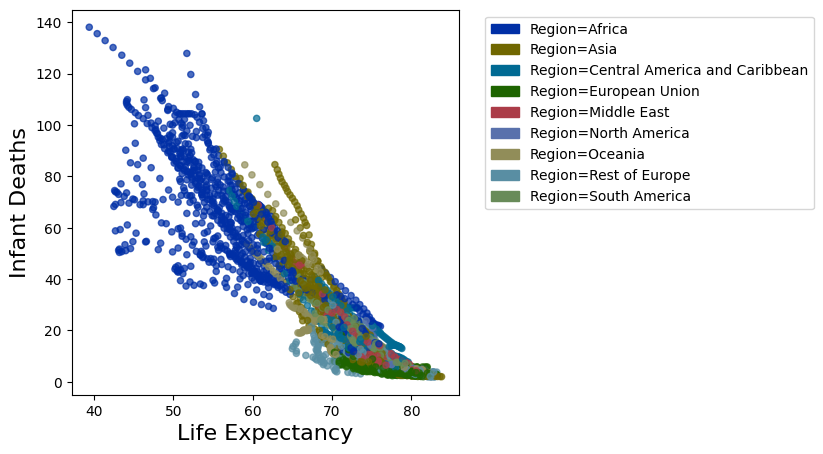

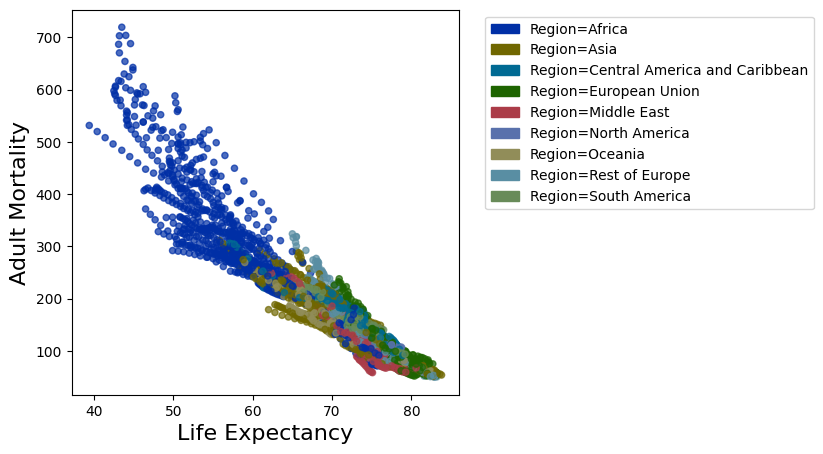

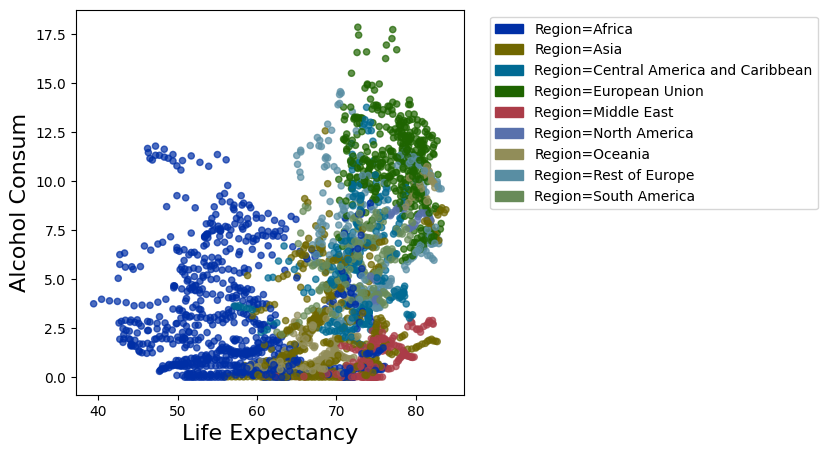

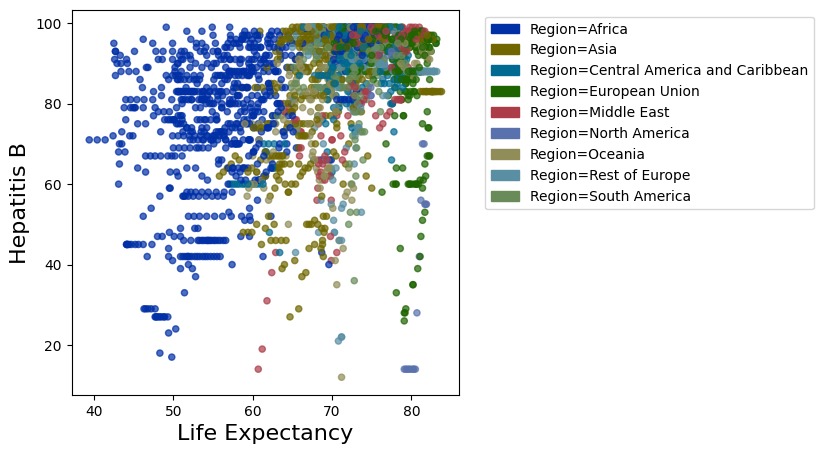

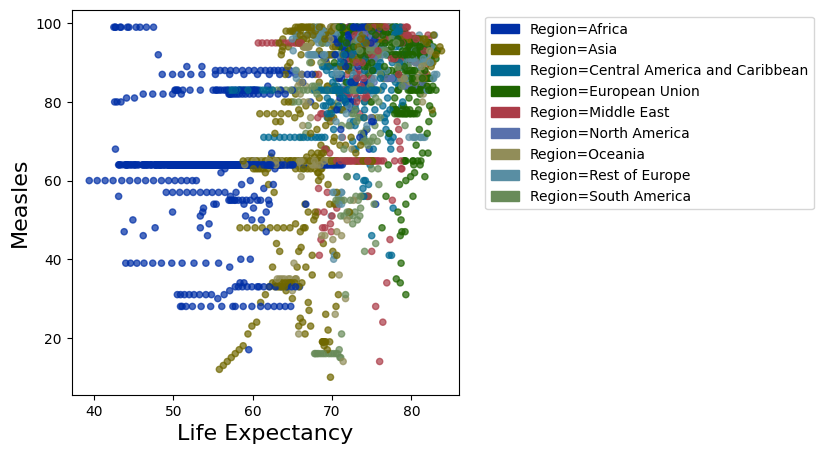

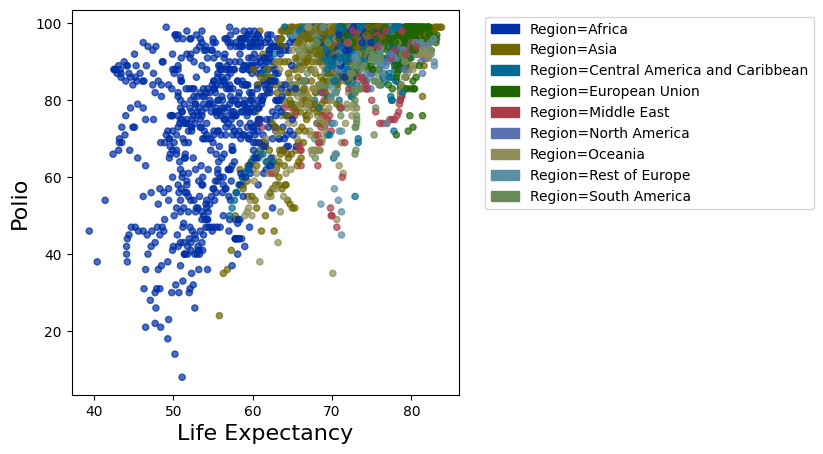

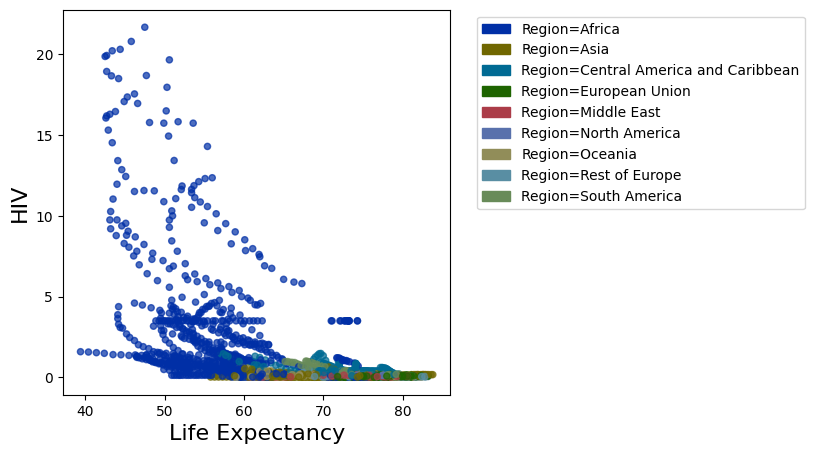

In [10]:
life_expectancy.scatter('Life Expectancy', 'Under 5 Deaths', group='Region')
life_expectancy.scatter('Life Expectancy', 'Infant Deaths', group='Region')
life_expectancy.scatter('Life Expectancy', 'Adult Mortality', group='Region')
life_expectancy.scatter('Life Expectancy', 'Alcohol Consum', group='Region')
life_expectancy.scatter('Life Expectancy', 'Hepatitis B', group='Region')
life_expectancy.scatter('Life Expectancy', 'Measles', group='Region')
life_expectancy.scatter('Life Expectancy', 'Polio', group='Region')
life_expectancy.scatter('Life Expectancy', 'HIV', group='Region')

I used the scatter plot to plot the life expectancy vs the other (Infant death, immunization rate, etc).

By observing these graph it is clear that countries with insufficiently developed healthcare systems tend to experience higher mortality rates. Furthermore, inadequate access to vaccinations and medical infrastructure exacerbates this issue.

Research question: Assess the relationship between population size and healthcare challenges such as HIV deaths and adult mortality. Do countries with larger populations face greater healthcare challenges? Display relevant tables and graphs.

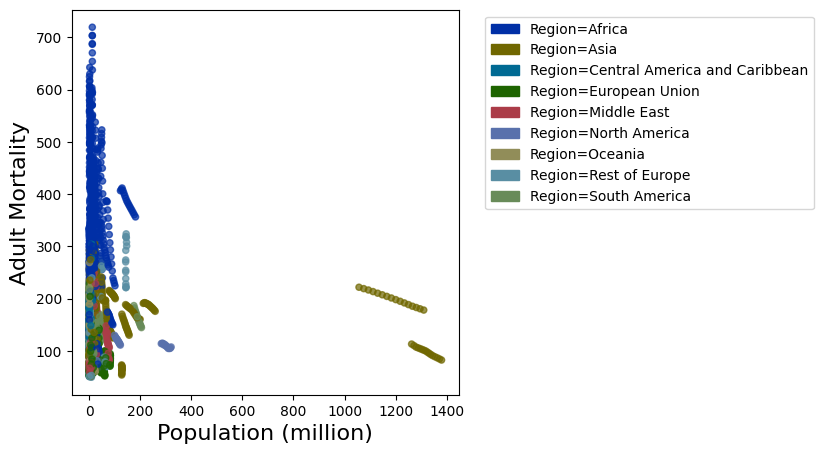

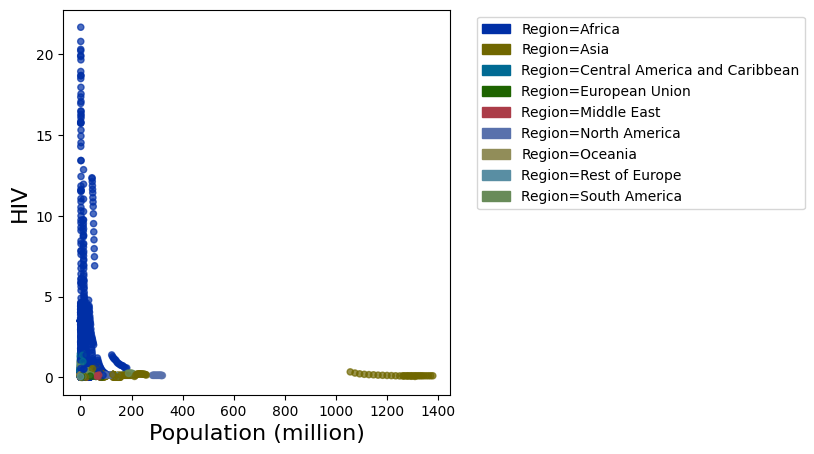

In [11]:
life_expectancy.scatter('Population (million)', 'Adult Mortality', group='Region')
life_expectancy.scatter('Population (million)', 'HIV', group='Region')

I use the scatter plot to plot the population vs the other (Infant death, immunization rate, etc) which used in our lab.

Countries with large populations do not necessarily exhibit high HIV death rates. In fact, some less populous developing countries have very high HIV mortality. In contrast, developed countries consistently show low HIV death rates.  Adult mortality is generally higher in developing countries, especially those with medium to large populations. On the other hand, developed countries maintain low and stable adult mortality rates regardless of population size.  Population size is not a direct determinant of major health challenges such as HIV and adult mortality. Rather, the level of economic development (Status) is a more significant factor. Developed countries typically have well established healthcare infrastructure, allowing for favorable health outcomes regardless of population size.  In developing countries, large populations may put pressure on healthcare systems, but other factors, such as education, GDP, and public health policies, also play a crucial role in shaping health outcomes.

Vaccinations are a key public health measure. So I will select the vaccination coverage rates for Hepatitis B, Polio and Measles. Then I will group by each `Region`.

Region,Hepatitis B mean,Polio mean,Measles mean
Africa,78.0257,76.2059,67.625
Asia,84.4028,88.1944,73.3148
Central America and Caribbean,89.9803,91.0493,82.6447
European Union,89.2083,95.5301,88.5347
Middle East,88.4152,90.0223,83.7589
North America,73.2917,92.8542,87.8333
Oceania,80.6648,81.8295,70.9716
Rest of Europe,87.3667,92.9542,89.9542
South America,88.0365,89.4271,74.1302


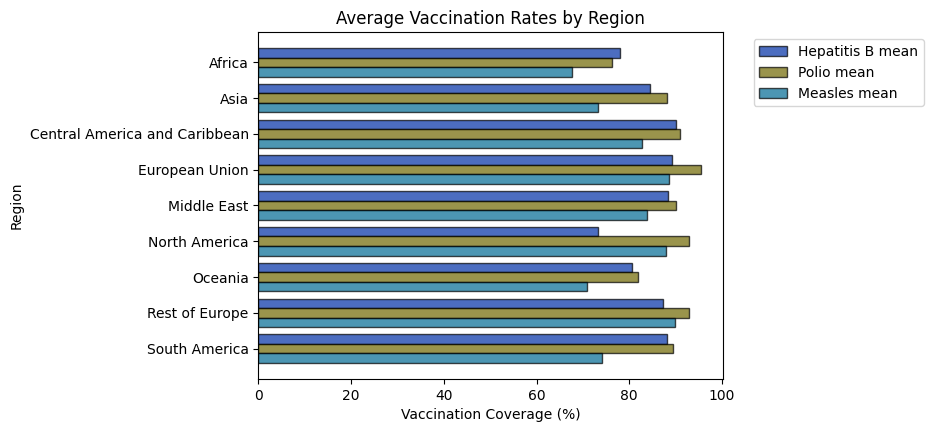

In [12]:
#tables
life_expectancy.group('Region', np.mean).select('Region', 'Hepatitis B mean', 'Polio mean', 'Measles mean').show()

#graph
df = life_expectancy.group('Region', np.mean).select('Region', 'Hepatitis B mean', 'Polio mean', 'Measles mean')

df.barh('Region')
plt.title('Average Vaccination Rates by Region')
plt.xlabel('Vaccination Coverage (%)')
plt.show()

I used np.mean to find the average of each region and create a bar graph. Both of technique used in the lab that we worked on.

Regions like Europe and the Americas have the highest vaccination rates for Hepatitis B, Polio, and Measles, while Africa shows the lowest coverage. This disparity is influenced by several factors:

Education (schooling columns) – Higher school enrollment leads to better health awareness and vaccine participation. Africa and South-East Asia have lower education levels.

Economic Status (GDP per Capita) – Wealthier regions can invest more in healthcare infrastructure and vaccine delivery.

Healthcare Access – Developed areas have better medical systems and consistent immunization programs.

Political Stability – Conflict and instability in some regions (e.g., Africa, Eastern Mediterranean) disrupt healthcare services.

Research question: Now I will dive into the dataset to understand the relationship between a country’s wealth and the well-being of its children. I will focus on the infant mortality rate and under-five mortality rate as key indicators of child health. I will group the countries by their region and calculate the average rates of infant and under-five mortality for each group then I will plot these averages to compare them.

Region,GDP per capita mean,Infant Deaths mean,Under 5 Deaths mean
Africa,2314.01,60.604,94.025
Asia,6560.96,32.5361,40.9653
Central America and Caribbean,8387.81,20.9655,25.9322
European Union,28140.4,4.87222,5.85833
Middle East,18957.3,16.6393,20.4571
North America,33783.9,9.925,11.6479
Oceania,10147,26.3051,32.4937
Rest of Europe,19090.2,9.62792,11.1796
South America,7232.03,19.9536,23.938


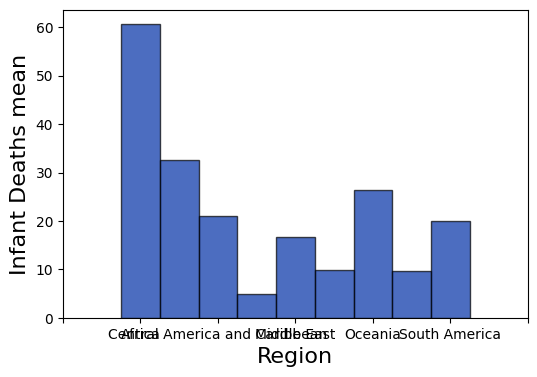

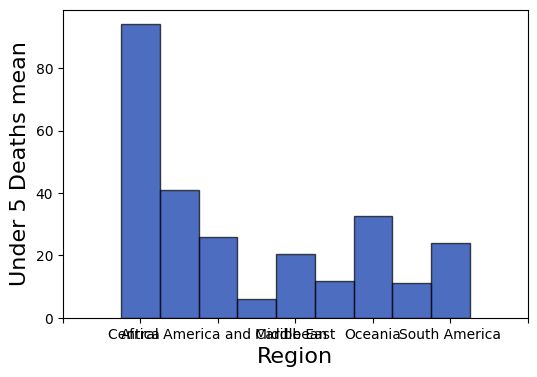

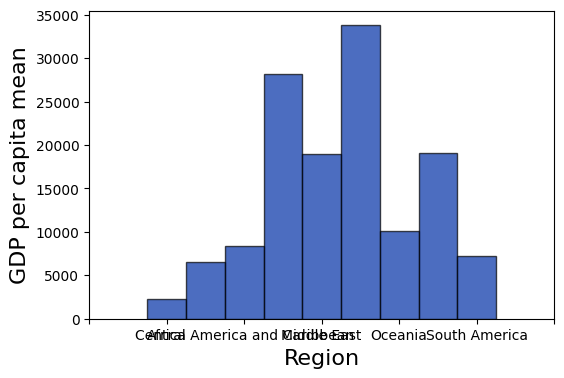

In [13]:
# tables
regional_summary = life_expectancy_uncleaned.select(
    'Region', 'GDP per capita', 'Infant Deaths', 'Under 5 Deaths'
).group('Region', np.mean)

regional_summary.show()

# graphs
regional_summary.bar('Region', 'Infant Deaths mean')
regional_summary.bar('Region', 'Under 5 Deaths mean')
regional_summary.bar('Region', 'GDP per capita mean')

I used np.mean to find the average and create the bar graph to easy to understand. Both technique used on the lab when we work at the section class.

Regions with higher GDP per capita, such as Europe and the Western Pacific, tend to have lower infant and child mortality rates, while regions with lower GDP, like Africa and South-East Asia, experience higher mortality—highlighting a clear negative correlation between wealth and child health outcomes.

Similar to the previous question, I will place GDP per capita into equal sized buckets and group them. I will use them to help me answer my research questions:
- Are wealthier countries generally performing better in terms of child health outcomes?
- Why might this be the case? (Hint: schooling? vaccination rates? anything else?)

Region,GDP per capita mean
Africa,2314.01
Asia,6560.96
Central America and Caribbean,8387.81
European Union,28140.4
Middle East,18957.3
North America,33783.9
Oceania,10147
Rest of Europe,19090.2
South America,7232.03


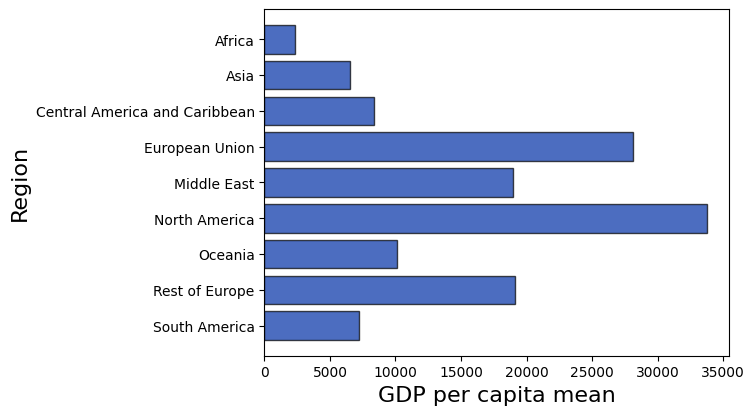

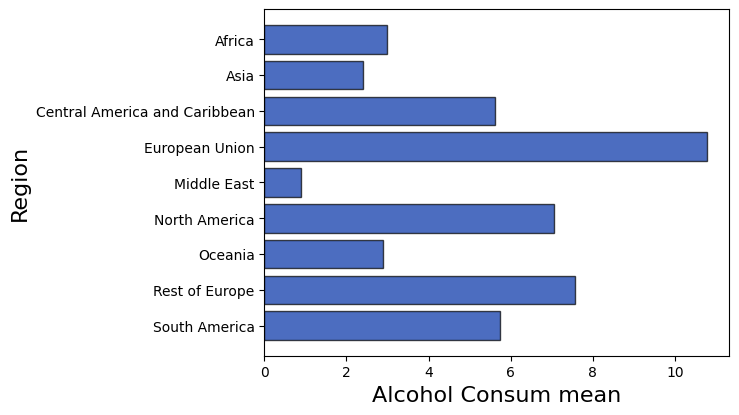

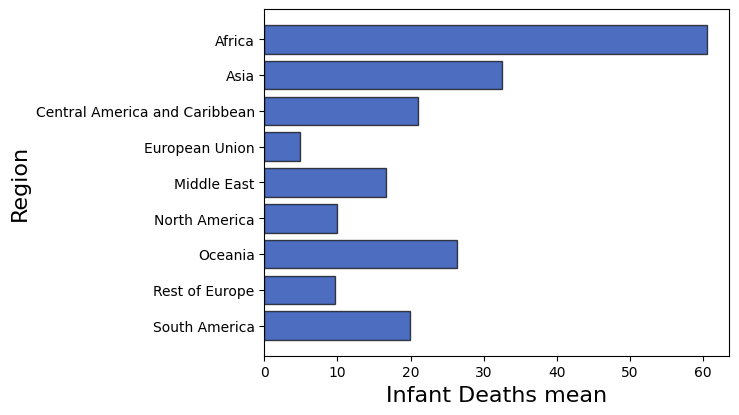

In [14]:
life_expectancy.group('Region', np.mean).select('Region', 'GDP per capita mean').show()
life_expectancy.group('Region', np.mean).select('Region', 'GDP per capita mean').barh('Region')
life_expectancy.group('Region', np.mean).select('Region', 'Alcohol Consum mean', 'Alcohol Consum mean').barh('Region', 'Alcohol Consum mean')
life_expectancy.group('Region', np.mean).select('Region', 'GDP per capita mean', 'Infant Deaths mean').barh('Region', 'Infant Deaths mean')

In general, wealthier countries perform better in terms of child health. This is the result of several key factors, including better education, available, affodable healthcare, and greater public awareness of health risks. In addition to these, improved sanitation, access to clean water, and high-quality food also contribute to better overall child health in wealthier regions.

I will now compare the health indicators such as thinness in teenagers, adult mortality, and life expectancy, between 3 countries classified as ‘Developed’ and 3 countries classified as ‘Developing’. I will Use comparative bar charts and discuss how economic status might influence these health indicators. What could be some health priorities for countries in each category?

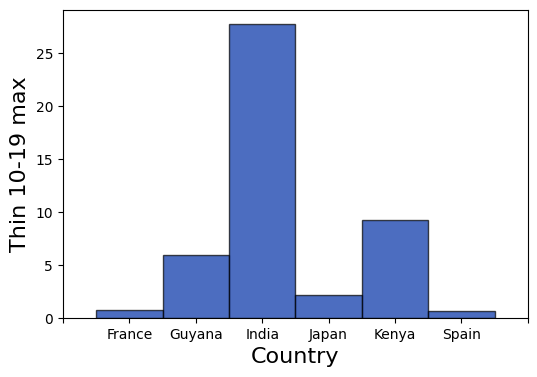

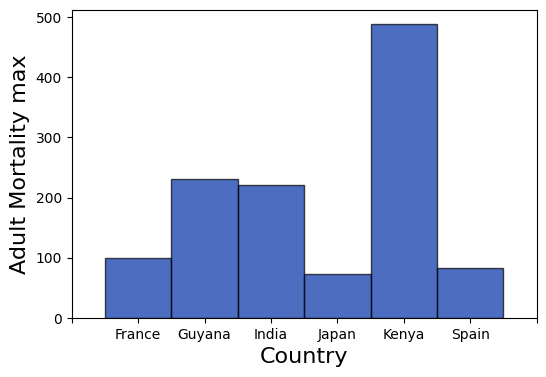

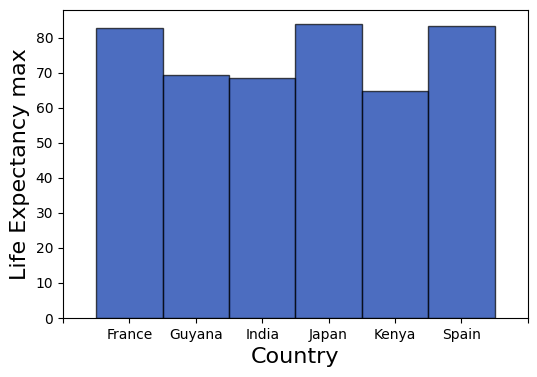

In [15]:
comparison = life_expectancy_uncleaned.where('Country', are.contained_in(['Spain', 'France', 'Japan', 'India', 'Guyana', 'Kenya']))

comparison_latest = comparison.group('Country', max).select(
    'Country', 'Thin 10-19 max', 'Adult Mortality max', 'Life Expectancy max'
)

comparison_latest.bar('Country', 'Thin 10-19 max')
comparison_latest.bar('Country', 'Adult Mortality max')
comparison_latest.bar('Country', 'Life Expectancy max')

By looking at the graphs, it is clear that developing countries tend to have worse outcomes across all indicators. For instance, education levels are significantly higher in developed countries. Looking at the "Thin 10–19" graph, we can see that India has the highest rate of undernourished teenagers, highlighting serious food challenges. In contrast, developed countries show consistently low levels of thinness among adolescents, suggesting a balanced situation, neither widespread starvation nor extreme obesity.

Research question: 
* Does education moderate the relationship between wealth and child health?

GDP_Infant_Deaths correlation -0.512286114781


Average Schooling Score,Correlation GDP_Infant Deaths
2.15,0.825574
2.4,-0.697099
2.41,-0.57376
2.455,0.138117
2.6,0.163414


Correlation: 0.0877937120877


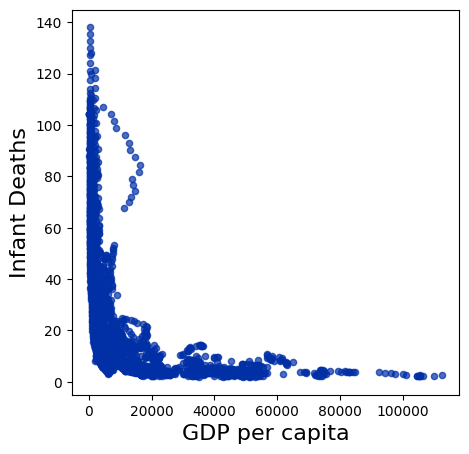

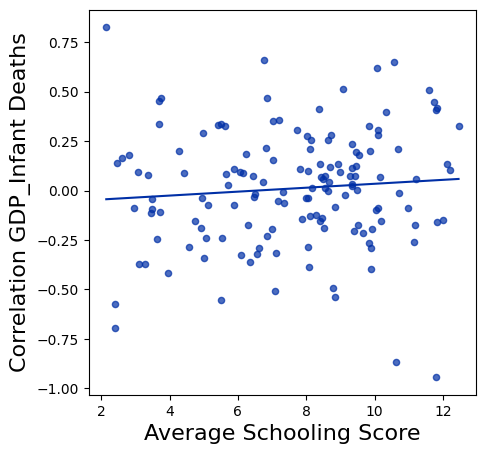

In [16]:
# SOLUTION (Kenny Vang)
#correlation between GDP and infant deaths of 20 data with almost the same GDP
life_expectancy.scatter('GDP per capita', 'Infant Deaths')
print('GDP_Infant_Deaths correlation',np.corrcoef(life_expectancy.column('GDP per capita'),life_expectancy.column('Infant Deaths'))[1][0])
GDPsortedLE=life_expectancy.sort('GDP per capita',descending=True)

correlations=[]
for number in range(0,GDPsortedLE.num_rows,20):
  number_GDP=GDPsortedLE.take(np.arange(number, min(number+20,GDPsortedLE.num_rows)))
  corr_number_GDP=np.corrcoef(number_GDP.column('GDP per capita'),number_GDP.column('Infant Deaths'))[1][0]
  if number_GDP.num_rows>1:
    correlations.append(corr_number_GDP)
  else:
    correlations.append(0)

# average GDP among 20 countries
grouped_mean=[]
for number in range(0,GDPsortedLE.num_rows,20):
  Schooling_grouped_20=np.mean(GDPsortedLE.column('Schooling')[number:number+20])
  grouped_mean.append(Schooling_grouped_20)

# table and scatter plot
Correlations_SC_ID=Table().with_columns('Average Schooling Score',grouped_mean,'Correlation GDP_Infant Deaths',correlations).sort('Average Schooling Score')
Correlations_SC_ID.show(5)
Correlations_SC_ID.scatter('Average Schooling Score','Correlation GDP_Infant Deaths',fit_line=True)

# correlation
Infant_Deaths=Correlations_SC_ID.column('Correlation GDP_Infant Deaths')
Schooling_Score=Correlations_SC_ID.column('Average Schooling Score')
print('Correlation:', np.corrcoef(Schooling_Score,Infant_Deaths)[1][0])

### Result Analysis
The correlation between schooling and correlation of GDP and infant mortality was close to 0, which meant that the schooling did not have a significant impact on the relation between GDP and infant mortality. Thus, the result did not support that schooling moderated the correlation between GDP per capita and infant mortality.

#### Explaination of my answer below:

* At first, I looked at correlation between GDP per capita and infant deaths to see if the question is valid or not. Then, I created vacant box for data of correlation between GDP and infant deaths in 20 countries which have a similar size of economy. I calculated it repeatedly and got the array that I would compare with the effect of schooling. In the next section, I made an array which had the same amount of data as 'correlation' and showed average schooling score among the 20 countries which was selected before. Finally, I made a scatter plot and calculated correlation between 'schooling' and 'correlation between GDP and infant deaths'. *

I made a new function that improvement rates from 2000 to 2015 and apply it to all the countries, and made a new table which included improvement rates. To simplify analysis, I extracted data in 2000, and calculated correlation.

**Research question: Do countries with higher schooling scores improve their life expectancy faster than lower ones?**

Schooling and Life Expectancy correlation -0.469976806586
Schooling and Life Expectancy correlation world -0.51011095522


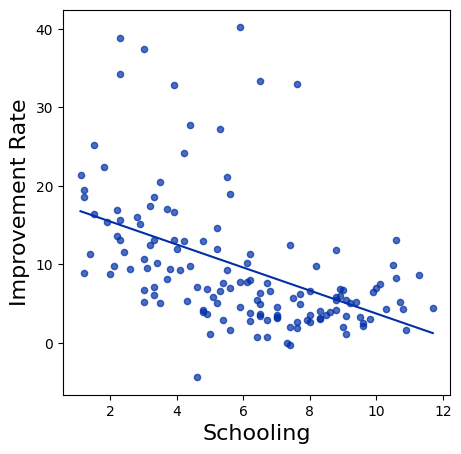

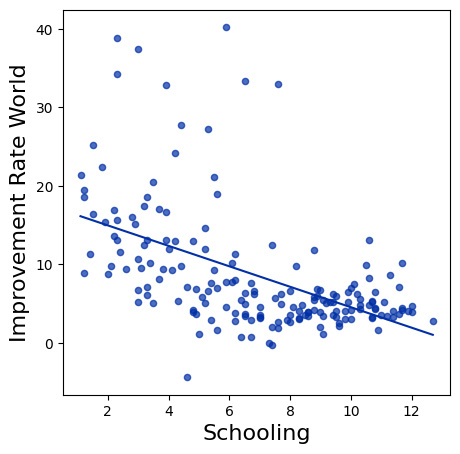

In [17]:
# SOLUTION (Kenny Vang)

# in developing countries
Developing_Countries = life_expectancy.where('Status', are.equal_to('Developing'))

# 2000->2015
def improve_rate(country):
    country_data = Developing_Countries.where('Country', are.equal_to(country)).sort('Year')
    if country_data.num_rows >= 16:
        before = country_data.column('Life Expectancy')[0]
        after = country_data.column('Life Expectancy')[15]
        if before > 0:
            return (after-before)/before*100
    return np.nan

improvement_Life_Expectancy = Developing_Countries.apply(improve_rate, 'Country')

Developing_Countries = Developing_Countries.with_column('Improvement Rate', improvement_Life_Expectancy)

data_in_2000=Developing_Countries.where('Year',are.equal_to(2000))
correlation = np.corrcoef(data_in_2000.column('Improvement Rate'), data_in_2000.column('Schooling'))[0, 1]

data_in_2000.scatter('Schooling', 'Improvement Rate', fit_line=True)
print('Schooling and Life Expectancy correlation', correlation)

# all over the world
# 2000->2015
def improve_rate_world(country):
    country_data_2 = life_expectancy.where('Country', are.equal_to(country)).sort('Year')
    if country_data_2.num_rows >= 16:
        before_2= country_data_2.column('Life Expectancy')[0]
        after_2 = country_data_2.column('Life Expectancy')[15]
        if before_2 > 0:
            return ((after_2-before_2)/before_2)*100
    return np.nan

improvement_Life_Expectancy_world = life_expectancy.apply(improve_rate_world, 'Country')

life_expectancy_world= life_expectancy.with_column('Improvement Rate World', improvement_Life_Expectancy_world)


data_in_2000_world=life_expectancy_world.where('Year',are.equal_to(2000))
correlation_world= np.corrcoef(data_in_2000_world.column('Improvement Rate World'), data_in_2000_world.column('Schooling'))[0, 1]

data_in_2000_world.scatter('Schooling', 'Improvement Rate World',fit_line=True)
print('Schooling and Life Expectancy correlation world', correlation_world)